<a href="https://colab.research.google.com/github/Andresdalla/Data_Analysis_Science/blob/main/Singapur_real_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Singapur Real State - Data management and analysis***
### ***Andrés Dalla Rizza***

In [ ]:
#Instalamos la librería para poder visualizar datos en mapas
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importamos todas las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime
from wordcloud import WordCloud, ImageColorGenerator

## ***Información importante del dataframe:***
Fuente:https://www.kaggle.com/datasets/teyang/singapore-hdb-flat-resale-prices-19902020

Se trabajará con 3 datasets los cuales contienen información sobre re-ventas de apartamentos en Singapur en los años 2000-2012, 2015-2016, 2017 - 2020

* Types of Flat Models:

* Standard: (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974.

* Improved: (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974.

* New Generation: Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room.

* Model A: Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm)

* Model A2: Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm)

* Simplified: Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm)

* Multi Generation: 3Gen flats designed to meet the needs of multi-generation families.

* Maisonette: AKA Model A Maisonette — 2 storeys HDB flat

* Premium Apartment: Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes

* Executive Maisonette: More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995

* Executive Apartment: Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments.

* D* BBS: public apartments built under the HDB's short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers. High Prices. Quite similiar to Executive Condominium except DBBS is like a premium HDB without facilities of private condos

* Adjoined Flat: Large HDB flats which are combined from 2 HDB flats

* Terrace: HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued

* Type S1S2: apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively

* 2-room: Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area

### ***Apreciación:***

Todas las conclusiones que impliquen la variable "Rasale price" serán hechos con el dataframe más reciente así se evita que la inflación influya considerablemente en los resultados.

# ***0)-Importamos los archivos csv:***




In [ ]:
#Importamos el csv correspondiente a los año 2000-2012
df_2000_2012 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df_2000_2012


FileNotFoundError: ignored

In [ ]:
#Importamos el csv correspondiente a los año 2015-2016
df_2015_2016 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df_2015_2016.head()

In [ ]:
#Importamos el csv correspondiente a los año 2017- adelante
df_2017 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards - resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df_2017.head()

# ***1)- Limpieza de datos:***




1.   Unión de datasets, formateo de los mismos
2.   Valores nulos
3.   Valores duplicados
4.   Eliminacion de columnas innecesarias
5.   Modificacion de columnas






### ***1.1 Unión de datasets y formateo de los mismos***




In [ ]:
df_aux2 = pd.concat([df_2015_2016,df_2017 ]).reset_index()
df_aux2 = df_aux2.drop(['remaining_lease'], axis=1)
df = pd.concat([df_2000_2012,df_aux2]).reset_index()
df = df.drop(['index'], axis=1)
df

### ***1.2 Manejo de valores nulos***

In [ ]:
#Vemos la cantidad de valores nulos y en qué columna se encuentran estos
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

Vemos que la cantidad total de nulls es muy chica comparada con  la cantidad total de datos. Por lo tanto no hace falta reemplasarlos por la media, simplemente eliminandolos obtenemos los resultados deseados.

In [ ]:
df = df.dropna()

In [ ]:
#Verificamos
df.isnull().sum()

level_0                0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

### ***1.3 Valores duplicados***

In [ ]:
#Vemos la cantidad de valores duplicados
df.duplicated().sum()

0

In [ ]:
#vemos en detalle cuales son
df1 = df[df.duplicated(keep=False)]
df1

,level_0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price


Al igual que los valores nulos, estos datos representan menos del 0,02% del total de los valores. Por lo que eliminarlos no resultaría significante a la hora de ver resultados.

In [ ]:
df = df.drop_duplicates()

In [ ]:
#verificamos
df.duplicated().sum()

0

### ***1.4 Eliminacón de columnas innecesarias***

Eliminaremos la columnas index, block pues estas son redundantes y no se usaran en el análisis.

In [ ]:
# df = df.drop(['index'], axis=1)
df = df.drop(['block'], axis=1)

### ***1.5 Modificación de columnas***

Primero que nada, cambiaremos los nombres de las columnas a un formato mas prolijo:

In [ ]:
df =df.rename(columns={'month': 'Date','street_name' : 'Street name', 'town': 'City','storey_range' : 'Storey range', 'flat_type': 'Rooms','floor_area_sqm': 'Floor area', 'flat_model': 'Flat model', 'resale_price': 'Resale price', 'lease_commence_date': 'Lease commence date'})

In [ ]:
df.head()

,level_0,Date,City,Rooms,Street name,Storey range,Floor area,Flat model,Lease commence date,Resale price
0,0,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986.0,147000.0
1,1,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986.0,144000.0
2,2,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976.0,159000.0
3,3,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976.0,167000.0
4,4,2000-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976.0,163000.0


Ahora tenemos que cambiar el tipo de dato de la columna 'Date' de objeto a datetime.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487151 entries, 0 to 487177
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   level_0              487151 non-null  int64  
 1   Date                 487151 non-null  object 
 2   City                 487151 non-null  object 
 3   Rooms                487151 non-null  object 
 4   Street name          487151 non-null  object 
 5   Storey range         487151 non-null  object 
 6   Floor area           487151 non-null  float64
 7   Flat model           487151 non-null  object 
 8   Lease commence date  487151 non-null  float64
 9   Resale price         487151 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 40.9+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m")

Ahora si nos fijamos en en los tipos de datos de cada columna, veremos que ahora el contenido de esta es de tipo ***datetime64[ns]***.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487151 entries, 0 to 487177
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   level_0              487151 non-null  int64         
 1   Date                 487151 non-null  datetime64[ns]
 2   City                 487151 non-null  object        
 3   Rooms                487151 non-null  object        
 4   Street name          487151 non-null  object        
 5   Storey range         487151 non-null  object        
 6   Floor area           487151 non-null  float64       
 7   Flat model           487151 non-null  object        
 8   Lease commence date  487151 non-null  float64       
 9   Resale price         487151 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 40.9+ MB


Separamos el Año y el mes en columna para previo análisis.

In [ ]:
#Lo hacemos por medio de la libría datetime
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
df.head()

,level_0,Date,City,Rooms,Street name,Storey range,Floor area,Flat model,Lease commence date,Resale price,Year,Month
0,0,2000-01-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986.0,147000.0,2000,1
1,1,2000-01-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986.0,144000.0,2000,1
2,2,2000-01-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976.0,159000.0,2000,1
3,3,2000-01-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976.0,167000.0,2000,1
4,4,2000-01-01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976.0,163000.0,2000,1


Ahora, procedemos a cambiar el contenido de la columna Flat type, para que su contenido sea mas fácil de analizar.

In [ ]:
#Vemos cuales son los valores con los que contamos
set(df['Rooms'])

{'1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI-GENERATION'}

In [ ]:
#Primero definimos un diccionario con los nombres de los nuevos valores
nuevos_val = {'1 ROOM': 1, '2 ROOM': 2 , '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE' : 5, 'MULTI-GENERATION' : 7}
df = df.replace({'Rooms': nuevos_val})

In [ ]:
df.head()

,level_0,Date,City,Rooms,Street name,Storey range,Floor area,Flat model,Lease commence date,Resale price,Year,Month
0,0,2000-01-01,ANG MO KIO,3,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986.0,147000.0,2000,1
1,1,2000-01-01,ANG MO KIO,3,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986.0,144000.0,2000,1
2,2,2000-01-01,ANG MO KIO,3,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976.0,159000.0,2000,1
3,3,2000-01-01,ANG MO KIO,3,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976.0,167000.0,2000,1
4,4,2000-01-01,ANG MO KIO,3,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976.0,163000.0,2000,1


Procedemos a agregar una columna llamada "Ubication", en la cual clasificamos cada ciudad por su ubicación.

In [ ]:
#info sacada de: https://simplemaps.com/data/sg-cities
ubication = {'WOODLANDS':'North', 'YISHUN':'North',  'CLEMENTI':'West', 'BEDOK':'East',  'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West',  'HOUGANG':'North East', 'BUKIT TIMAH':'Central',  'CHOA CHU KANG':'West',
       'GEYLANG':'Central', 'JURONG EAST':'West','BISHAN':'Central', 'JURONG WEST':'West',
       'CENTRAL AREA':'Central', 'KALLANG/WHAMPOA':'Central', 'TOA PAYOH':'Central','SEMBAWANG':'North', 'MARINE PARADE':'Central',  'SERANGOON':'North East','PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central',  'SENGKANG':'North East', 'TAMPINES':'East',
       'ANG MO KIO':'North East'}
df['Ubication'] = df['City']
df = df.replace({'Ubication': ubication})

# ***2)- Análisis de datos***


1.   Según ciudad
2.   Según modelo de apartamento
3.   Relación entre Cantidad de cuartos, precio, y metros cuadrados
4.   Visualización de correlaciones
5.   Según Ubicacion geográfica
6.   Según Metros cuadrados


### ***2.1 Según ciudad***

Primero veremos una representación gráfica de cuales son las ciudades más relevantes en lo que respecta a las re-ventas.

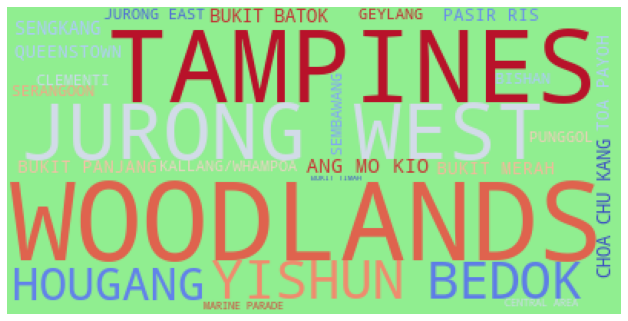

In [ ]:
#Utilizamos la librería worcloud
data = df['City'].value_counts().to_dict()
wc = WordCloud(colormap='coolwarm', background_color= 'lightgreen').generate_from_frequencies(data)
plt.figure( figsize=(11,8))
plt.tight_layout()
plt.imshow(wc)
plt.axis('off')
plt.show()

Procedemos a ver la forma en la que varió la cantidad de re-ventas a lo largo de los años en cada ciudad

In [ ]:
#Cambiamos el tipo de datos de la columna 'Year' para poder operar de una forma más cómoda
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487151 entries, 0 to 487177
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   level_0              487151 non-null  int64         
 1   Date                 487151 non-null  datetime64[ns]
 2   City                 487151 non-null  object        
 3   Rooms                487151 non-null  int64         
 4   Street name          487151 non-null  object        
 5   Storey range         487151 non-null  object        
 6   Floor area           487151 non-null  float64       
 7   Flat model           487151 non-null  object        
 8   Lease commence date  487151 non-null  float64       
 9   Resale price         487151 non-null  float64       
 10  Year                 487151 non-null  int64         
 11  Month                487151 non-null  int64         
 12  Ubication            487151 non-null  object        
dtypes: datetime64[

In [ ]:
#filtramos los dataframes por anios
aux1 = df[df['Year'].isin([2000,2012])]
aux3 = df[df['Year'].isin([2015,2016])]
aux4 = df[df['Year'].isin([2017,2020])]

In [ ]:
aux1_1 = pd.DataFrame(aux1['City'].value_counts() * 100  / aux1['City'].value_counts().sum())
aux1_1['town'] = aux1_1.index
aux3_3 = pd.DataFrame(aux3['City'].value_counts() * 100  / aux3['City'].value_counts().sum())
aux3_3['town'] = aux3_3.index
aux4_4 = pd.DataFrame(aux4['City'].value_counts() * 100  / aux4['City'].value_counts().sum())
aux4_4['town'] = aux4_4.index

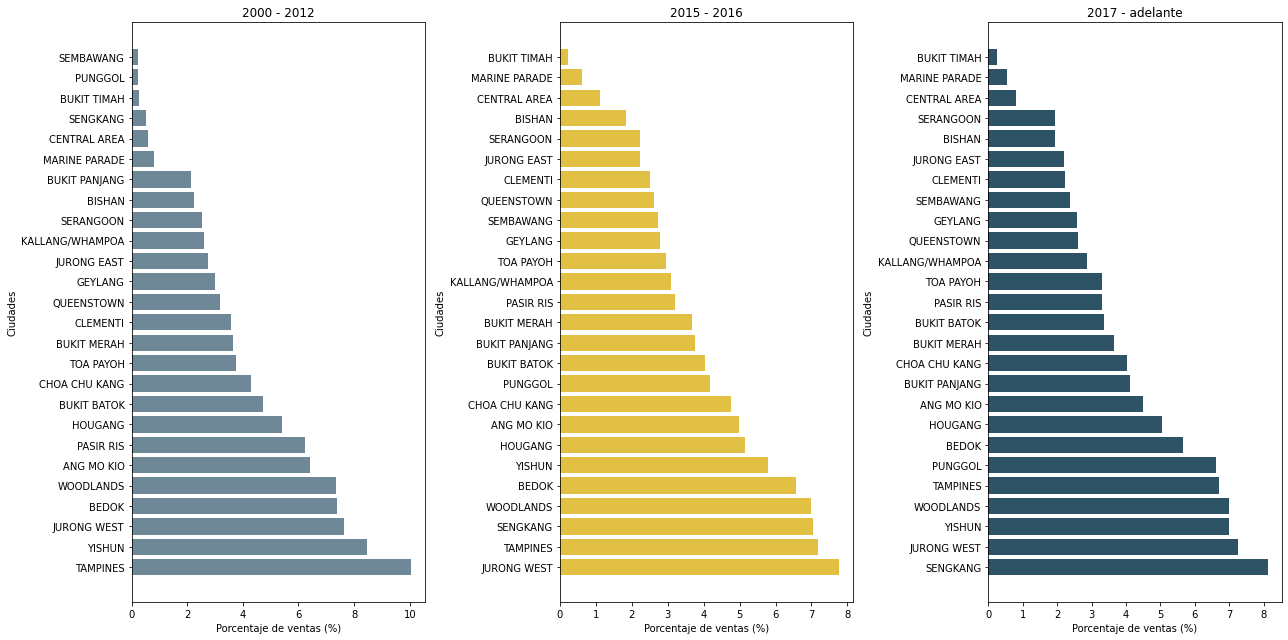

In [ ]:
plt.figure(figsize=(18,9))
plt.subplot(1,3,1)
plt.barh(aux1_1['town'],aux1_1['City'], color ='#6e8898' )
plt.ylabel('Ciudades')
plt.xlabel('Porcentaje de ventas (%)')
plt.title('2000 - 2012')
plt.subplot(1,3,2)
plt.barh(aux3_3['town'],aux3_3['City'], color ='#e2c044' )
plt.ylabel('Ciudades')
plt.xlabel('Porcentaje de ventas (%)')
plt.title('2015 - 2016')
plt.subplot(1,3,3)
plt.barh(aux4_4['town'],aux4_4['City'], color ='#2e5266' )
plt.ylabel('Ciudades')
plt.xlabel('Porcentaje de ventas (%)')
plt.title('2017 - adelante')
plt.tight_layout()
plt.show()

Como podemos ver hubo ciudades que se destacaron por su incremento en  cuanto a las reventas, y otras por lo contrario. Esto se debe al potencial de desarrollo de cada ciudad. Vamos a ver cuales fueron las ciudades cuyo aumento fue el mayor, y aquellas que fue el menor.

In [ ]:
#calculamos el decremento/aumento de porcentaje de re-ventas en  cada ciudad
aux5_5 = pd.DataFrame((aux4['City'].value_counts() * 100  / aux4['City'].value_counts().sum()) - (aux1['City'].value_counts() * 100  / aux1['City'].value_counts().sum()))
aux5_5['town'] = aux5_5.index
aux5_5 = aux5_5.sort_values('City', ascending=False)

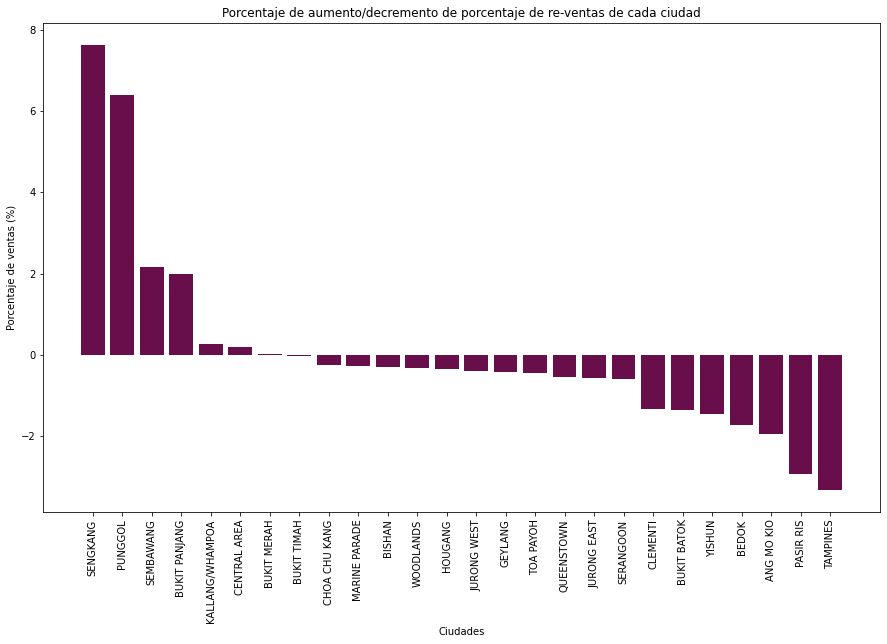

In [ ]:
plt.figure(figsize=(15,9))
plt.bar(aux5_5['town'],aux5_5['City'], color = '#680e4b')
plt.xlabel('Ciudades')
plt.ylabel('Porcentaje de ventas (%)')
plt.xticks(rotation = 90)
plt.title('Porcentaje de aumento/decremento de porcentaje de re-ventas de cada ciudad')
plt.show()

Notamos casos como los de Sengkang y Pungool que se destacan en el aumento de las re-ventas, y otros como Tampines y Pasir Ris cuyo porcentaje es negativo. Procedemos a estudiar como vario a lo largo del tiempo las reventas en las  3 ciudades con mayor aumento y las 3 ciudades con mayor decremento.

In [ ]:
#3 ciudades con mas aumento de re-ventas
SENGKANG = df[df['City'].isin(['SENGKANG'])]
PUNGGOL = df[df['City'].isin(['PUNGGOL'])]
BUKIT = df[df['City'].isin(['BUKIT PANJANG'])]
#3 ciudades con mas decremento de re-ventas
TAMPINES = df[df['City'].isin(['TAMPINES'])]
PASIR = df[df['City'].isin(['PASIR RIS'])]
ANG = df[df['City'].isin(['ANG MO KIO'])]

In [ ]:
SENGKANG_df = pd.DataFrame(SENGKANG['Year'].value_counts()).reset_index()
SENGKANG_df = SENGKANG_df.sort_values('index')
PUNGGOL_df = pd.DataFrame(PUNGGOL['Year'].value_counts()).reset_index()
PUNGGOL_df = PUNGGOL_df.sort_values('index')
BUKIT_df = pd.DataFrame(BUKIT['Year'].value_counts()).reset_index()
BUKIT_df = BUKIT_df.sort_values('index')
TAMPINES_df = pd.DataFrame(TAMPINES['Year'].value_counts()).reset_index()
TAMPINES_df = TAMPINES_df.sort_values('index')
PASIR_df = pd.DataFrame(PASIR['Year'].value_counts()).reset_index()
PASIR_df = PASIR_df.sort_values('index')
ANG_df = pd.DataFrame(ANG['Year'].value_counts()).reset_index()
ANG_df = ANG_df.sort_values('index')


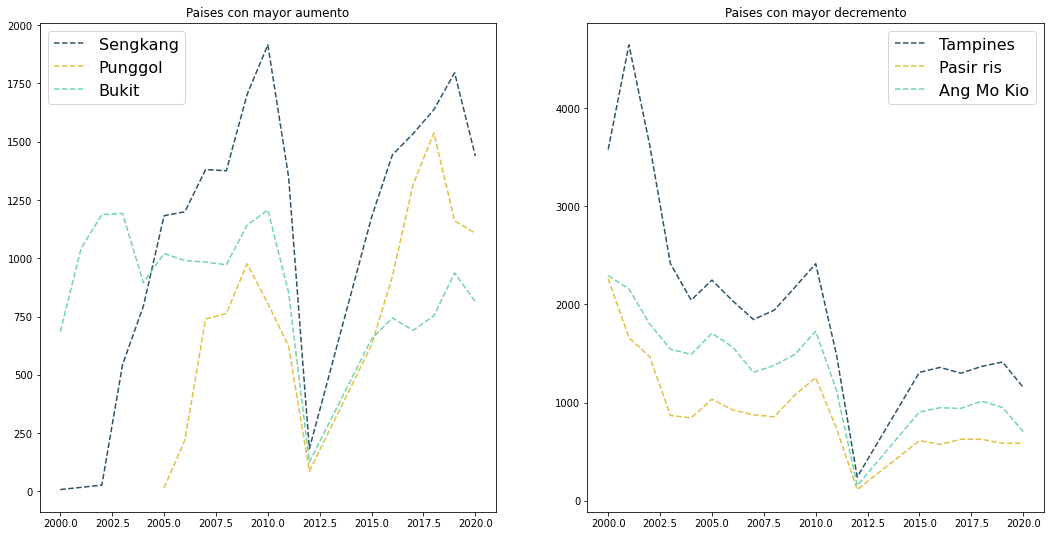

In [ ]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.plot(SENGKANG_df['index'],SENGKANG_df['Year'], color = '#2e5266', label = 'Sengkang', linestyle = 'dashed')
plt.plot(PUNGGOL_df['index'],PUNGGOL_df['Year'], color = '#e2c044', label = 'Punggol', linestyle = 'dashed')
plt.plot(BUKIT_df['index'],BUKIT_df['Year'], color = '#74d3ae', label = 'Bukit', linestyle = 'dashed')
plt.legend(loc='best', facecolor='w', fontsize=16)
plt.title('Paises con mayor aumento')
plt.subplot(1,2,2)
plt.plot(TAMPINES_df['index'],TAMPINES_df['Year'], color = '#2e5266', label = 'Tampines', linestyle = 'dashed')
plt.plot(PASIR_df['index'],PASIR_df['Year'], color = '#e2c044', label = 'Pasir ris', linestyle = 'dashed')
plt.plot(ANG_df['index'],ANG_df['Year'], color = '#74d3ae', label = 'Ang Mo Kio', linestyle = 'dashed')
plt.legend(loc='best', facecolor='w', fontsize=16)
plt.title('Paises con mayor decremento')
plt.show()

***Observaciones:***


*   Observamos como los países comparten tendencias de crecimiento y decrecimiento.
*   También podemos intuir aspectos generales de la economía del país por las tendencias de las gráficas. En el caso de 2012, la economía de Singapur tuvo un crecimiento notoriamente mas bajo de lo esperado, y lo podemos ver con la caída de las re-ventas.
*   Por último es interesante ver que tan bien responden las ciudades a las caídas de las re-ventas. Por ejemplo en el caso de Sengkang, vemos que es la última en caer, y la primera en salir de la baja cantidad de



### ***2.2 Según modelo de apartamento***

Usaremos los ***Violin plots*** para ver como varían los precios de cada tipo de apartamento. Los ***violin plots*** son muy similares a los ***boxplots***, pero presentan ventajas respecto a los anteriores pues se puede apreciar la densidad de probabilidad. Esto hace que se pueda apreciar información relevante por la forma que tienen.

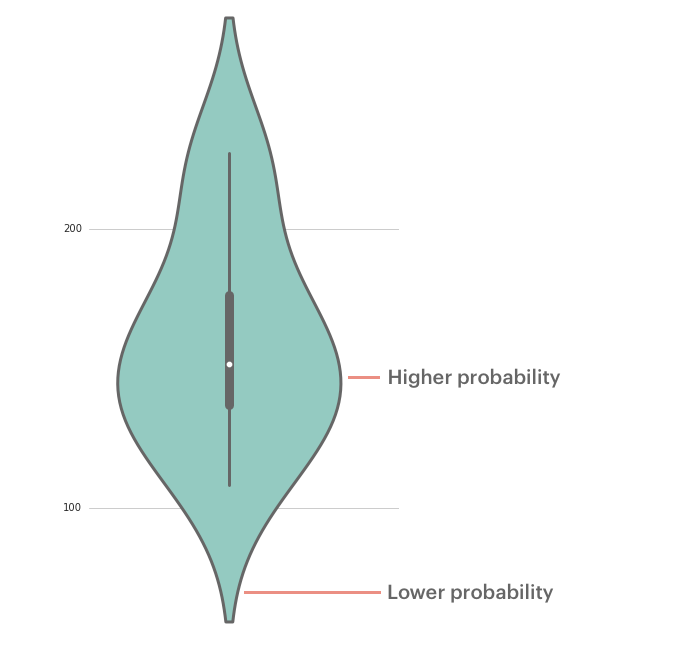

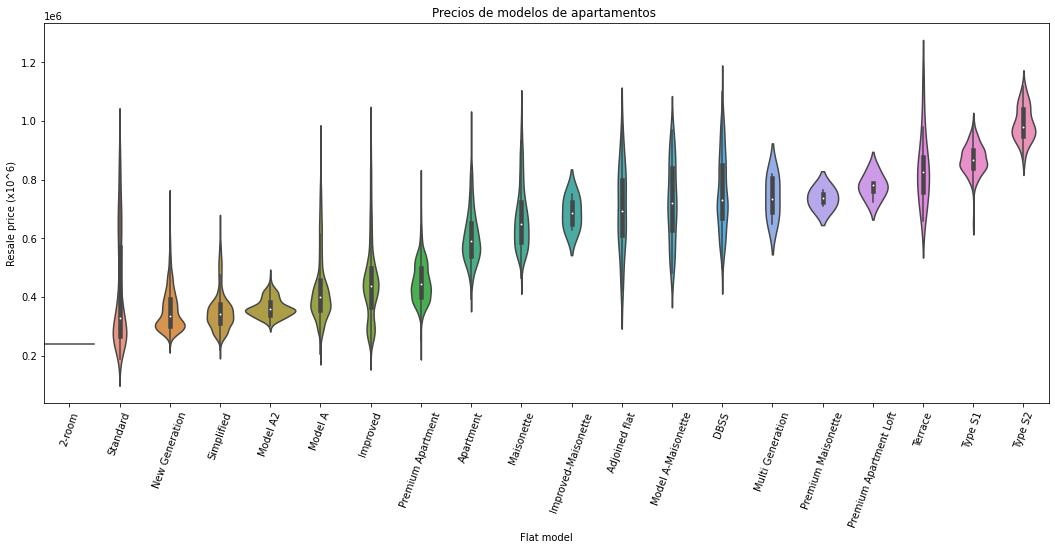

In [ ]:
fig = plt.figure(figsize=(18,7))
p=sns.violinplot(x=aux3['Flat model'], y=aux3['Resale price'], data=aux3, width=1,order=aux3.groupby('Flat model')['Resale price'].median().sort_values().reset_index()['Flat model'].tolist())
plt.xticks(rotation = 70)
plt.ylabel('Resale price (x10^6)')
plt.title('Precios de modelos de apartamentos ')
plt.show()

En general vemos que aquellos modelos en los cuales su mediana es más representativa, la forma de los violin plots es mas acortada, o hay menos valores "outliers" o valores atípicos.

Continuaremos estudiando la variación de los modelos de apartamento en el correr de los años.

In [ ]:
def value_c(df_a,text):
  a = pd.DataFrame(df_a).reset_index()
  return a

In [ ]:
b = value_c(aux1['Flat model'].value_counts(),'index')
b = b[:9]
c = value_c(aux3['Flat model'].value_counts(),'index')
c = c[:9]
d = value_c(aux4['Flat model'].value_counts(),'index')
d = d[:9]


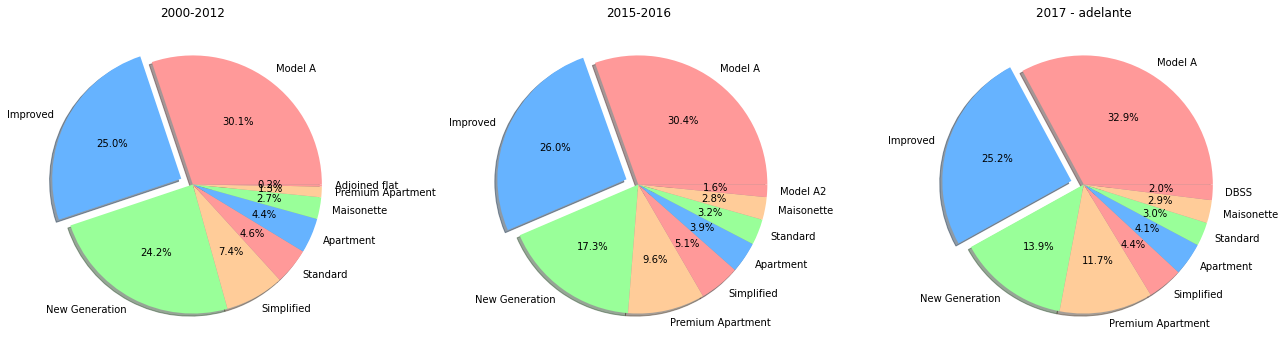

In [ ]:
plt.figure(figsize=(18,9))
plt.subplot(1,3,1)
salir = (0, 0.1, 0, 0,0,0,0,0,0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(b['Flat model'], labels = b['index'], explode = salir , autopct='%1.1f%%', shadow = True, colors =colors)
plt.title('2000-2012')

plt.subplot(1,3,2)
plt.pie(c['Flat model'],labels = c['index'],explode = salir ,autopct='%1.1f%%', shadow = True, colors =colors)
plt.title('2015-2016')
plt.subplot(1,3,3)
plt.pie(d['Flat model'],labels = d['index'],explode = salir ,autopct='%1.1f%%', shadow = True, colors =colors)
plt.title('2017 - adelante')
plt.tight_layout()
plt.show()

Hay un predominio de los modelos "Model A" e "Improved" en el correr de los años. Vemos variaciones en los modelos con menor porcentaje de venta. Es importante ver la consistencia de los modelos en los años para así saber cuales son seguros en una posible inversión, o simplemnte saber cuales son aquellas propiedades que mantinen correctamente su valor a lo largo de los años

### ***2.3 Relación entre Cantidad de cuartos, precio, y metros cuadrados***

Como queremos relacionar 3 variables haremos una grafica en 3 dimensiones, para ver como varía el precio en funcion de la cantidad de cuartos y de los metros cuadrados. Con esta gráfica podemos ver las áreas en donde la gráfica se maximiza y aquellos lugares en donde la gráfica se minimiza

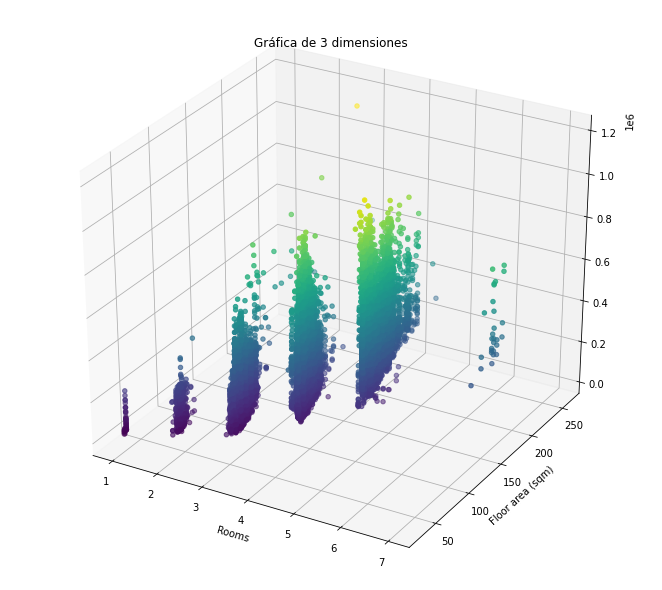

In [ ]:
x = df['Rooms'].sample(n=60000, random_state=1).to_numpy()
y = df['Floor area'].sample(n=60000, random_state=1).to_numpy()
z = df['Resale price'].sample(n=60000, random_state=1).to_numpy()
fig = plt.figure(figsize = (9,8))
axes3d = Axes3D(fig)
axes3d.scatter(x,y,z, c=z, cmap = 'viridis')
axes3d.set_xlabel('Rooms')
axes3d.set_ylabel('Floor area (sqm)')
plt.title('Gráfica de 3 dimensiones')
plt.show()

Es claro ver cual es la zona en donde se maximiza el precio, y aquella en la cual se minimiza. Podemos ver una clara proporcionalidad entre el aumento de cuartos y area en metros cuadrados con el precio del apartamento.

### ***2.4 Visualización de correlaciones***

Veremos cuales son las variables que tieenen más (o menos) correnalción entre sí por medio de una matriz de correlación

In [ ]:
matriz = df.corr()
matriz =  matriz.drop(['Month'], axis=1)
matriz =  matriz.drop(['Month'], axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  after removing the cwd from sys.path.


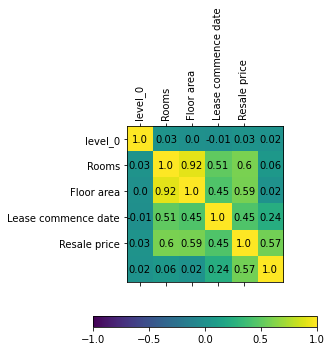

In [ ]:

plt.matshow(matriz, cmap = 'viridis',vmin = -1, vmax = 1)
plt.xticks(range(5), matriz.columns, rotation = 90)
plt.yticks(range(5), matriz.columns)
plt.tight_layout()
plt.colorbar( location  = 'bottom')
for i in (range(len(matriz.columns))):
  for j in (range(len(matriz.columns))):
    plt.text(i,j,round(matriz.iloc[i,j],2),ha = 'center', va = 'center' )
plt.show()

Vemos claras correlaciones que veremos en detalle

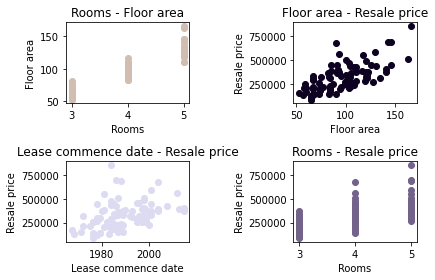

In [ ]:

fig, ax = plt.subplots(2, 2)
ax[1,1].scatter(df['Rooms'].sample(n=100, random_state=1),df['Resale price'].sample(n=100, random_state=1), color = '#73628a')
ax[1,1].set_title('Rooms - Resale price')
ax[1,1].set(xlabel='Rooms', ylabel='Resale price')
ax[0,0].scatter(df['Rooms'].sample(n=100, random_state=1),df['Floor area'].sample(n=100, random_state=1), color = '#d1beb0')
ax[0,0].set_title('Rooms - Floor area')
ax[0,0].set(xlabel='Rooms', ylabel='Floor area')
ax[0,1].scatter(df['Floor area'].sample(n=100, random_state=1),df['Resale price'].sample(n=100, random_state=1), color = '#0d0221')
ax[0,1].set_title('Floor area - Resale price')
ax[0,1].set(xlabel='Floor area', ylabel='Resale price')
ax[1,0].scatter(df['Lease commence date'].sample(n=100, random_state=1),df['Resale price'].sample(n=100, random_state=1), color = '#dddbf1')
ax[1,0].set_title('Lease commence date - Resale price')
ax[1,0].set(xlabel='Lease commence date', ylabel='Resale price')
plt.tight_layout()
plt.show()

### ***2.5 Según ubicación Geográfica***

In [ ]:
a = aux4.groupby('Ubication')['Rooms','Floor area','Resale price'].median()
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Rooms,Floor area,Resale price
Ubication,,,
Central,4.0,87.0,508000.0
East,4.0,104.0,438000.0
North,4.0,100.0,365000.0
North East,4.0,93.0,430000.0
West,4.0,103.0,390000.0


Notar como en las areas céntricas el promedio área en metros cuadrados es notoriamente menor que en otros lugares.

***Creación de mapa interactivo con folium***

In [ ]:
#Usamos folium la cual es una libreria para la visualizacion de informacion en mapas
import folium
from folium import plugins
import geocoder

In [ ]:
#Con esta libreria, obtenemos facilmente la latitud y longitud de todas las ciudades
ANG_MO_KIO = geocoder.osm('Ang mo kio, SINGAPORE')
BEDOK = geocoder.osm('Bedok, SINGAPORE')
BISHAN = geocoder.osm('BISHAN, SINGAPORE')
BUKIT_BATOK = geocoder.osm('BUKIT BATOK, SINGAPORE')
BUKIT_MERAH = geocoder.osm('BUKIT MERAH, SINGAPORE')
BUKIT_PANJANG = geocoder.osm('BUKIT PANJANG, SINGAPORE')
CHOA_CHU_KANG = geocoder.osm('CHOA CHU KANG, SINGAPORE')
CLEMENTI = geocoder.osm('CLEMENTI, SINGAPORE')
GEYLANG = geocoder.osm('GEYLANG, SINGAPORE')
HOUGANG = geocoder.osm('HOUGANG, SINGAPORE')
JURONG_EAST = geocoder.osm('JURONG EAST, SINGAPORE')
JURONG_WEST = geocoder.osm('JURONG WEST. SINGAPORE')
WHAMPOA = geocoder.osm('WHAMPOA, SINGAPORE')
MARINE_PARADE = geocoder.osm('MARINE PARADE, SINGAPORE')
PASIR_RIS = geocoder.osm('PASIR RIS, SINGAPORE')
PUNGGOL = geocoder.osm('PUNGGOL, SINGAPORE')
QUEENSTOWN = geocoder.osm('QUEENSTOWN, SINGAPORE')
SEMBAWANG = geocoder.osm('SEMBAWANG, SINGAPORE')
SENGKANG = geocoder.osm('SENGKANG, SINGAPORE')
TAMPINES = geocoder.osm('TAMPINES, SINGAPORE')
TOA_PAYOH = geocoder.osm('TOA PAYOH, SINGAPORE')
WOODLANDS = geocoder.osm('WOODLANDS, SINGAPORE')
YISHUN = geocoder.osm('YISHUN, SINGAPORE')

In [ ]:
#con '.lat' y '.lgn' obtenemos la latitud y longitud de cata ciudad
ANG_MO_KIO_latlng = [ANG_MO_KIO.lat,ANG_MO_KIO.lng, int(aux4['City'].value_counts()['ANG MO KIO'])]
BEDOK_latlng = [BEDOK.lat,BEDOK.lng,    int(aux4['City'].value_counts()['BEDOK'])]
BISHAN_latlng = [BISHAN.lat,BISHAN.lng, int(aux4['City'].value_counts()['BISHAN'])]
BUKIT_BATOK_latlng = [BUKIT_BATOK.lat,BUKIT_BATOK.lng, int(aux4['City'].value_counts()['BUKIT BATOK'])]
BUKIT_MERAH_latlng = [BUKIT_MERAH.lat,BUKIT_MERAH.lng, int(aux4['City'].value_counts()['BUKIT MERAH'])]
BUKIT_PANJANG_latlng = [BUKIT_PANJANG.lat,BUKIT_PANJANG.lng, int(aux4['City'].value_counts()['BUKIT PANJANG'])]
CHOA_CHU_KANG_latlng = [CHOA_CHU_KANG.lat,CHOA_CHU_KANG.lng, int(aux4['City'].value_counts()['CHOA CHU KANG'])]
CLEMENTI_latlng = [CLEMENTI.lat,CLEMENTI.lng, int(aux4['City'].value_counts()['CLEMENTI'])]
GEYLANG_latlng = [GEYLANG.lat,GEYLANG.lng, int(aux4['City'].value_counts()['GEYLANG'])]
HOUGANG_latlng = [HOUGANG.lat,HOUGANG.lng, int(aux4['City'].value_counts()['HOUGANG'])]
JURONG_EAST_latlng = [JURONG_EAST.lat,JURONG_EAST.lng, int(aux4['City'].value_counts()['JURONG EAST'])]
JURONG_WEST_latlng = [JURONG_WEST.lat,JURONG_WEST.lng, int(aux4['City'].value_counts()['JURONG WEST'])]
WHAMPOA_latlng = [WHAMPOA.lat,WHAMPOA.lng, int(aux4['City'].value_counts()['KALLANG/WHAMPOA'])]
MARINE_PARADE_latlng = [MARINE_PARADE.lat,MARINE_PARADE.lng, int(aux4['City'].value_counts()['MARINE PARADE'])]
PASIR_RIS_latlng = [PASIR_RIS.lat,PASIR_RIS.lng, int(aux4['City'].value_counts()['PASIR RIS'])]
PUNGGOL_latlng = [PUNGGOL.lat,PUNGGOL.lng, int(aux4['City'].value_counts()['PUNGGOL'])]
QUEENSTOWN_latlng = [QUEENSTOWN.lat,QUEENSTOWN.lng, int(aux4['City'].value_counts()['QUEENSTOWN'])]
SEMBAWANG_latlng = [SEMBAWANG.lat,SEMBAWANG.lng, int(aux4['City'].value_counts()['SEMBAWANG'])]
SENGKANG_latlng = [SENGKANG.lat,SENGKANG.lng, int(aux4['City'].value_counts()['SENGKANG'])]
TAMPINES_latlng = [TAMPINES.lat,TAMPINES.lng, int(aux4['City'].value_counts()['TAMPINES'])]
TOA_PAYOH_latlng = [TOA_PAYOH.lat,TOA_PAYOH.lng, int(aux4['City'].value_counts()['TOA PAYOH'])]
WOODLANDS_latlng = [WOODLANDS.lat,WOODLANDS.lng, int(aux4['City'].value_counts()['WOODLANDS'])]
YISHUN_latlng = [TAMPINES.lat,TAMPINES.lng, int(aux4['City'].value_counts()['YISHUN'])]

In [ ]:
final_1 = [ANG_MO_KIO_latlng,BEDOK_latlng, BISHAN_latlng, BUKIT_BATOK_latlng,BUKIT_MERAH_latlng,BUKIT_PANJANG_latlng, CHOA_CHU_KANG_latlng, CLEMENTI_latlng, GEYLANG_latlng,
         HOUGANG_latlng, JURONG_EAST_latlng, JURONG_WEST_latlng, WHAMPOA_latlng, MARINE_PARADE_latlng, PASIR_RIS_latlng, PUNGGOL_latlng, QUEENSTOWN_latlng, SEMBAWANG_latlng,
         SENGKANG_latlng, TAMPINES_latlng, TOA_PAYOH_latlng, WOODLANDS_latlng, YISHUN_latlng]

In [ ]:
ANG_MO_KIO_latlng_2 = [ANG_MO_KIO.lat,ANG_MO_KIO.lng, int(aux4.groupby('City')['Resale price'].mean()['ANG MO KIO'])]
BEDOK_latlng_2 = [BEDOK.lat,BEDOK.lng,    int(aux4.groupby('City')['Resale price'].mean()['BEDOK'])]
BISHAN_latlng_2= [BISHAN.lat,BISHAN.lng, int(aux4.groupby('City')['Resale price'].mean()['BISHAN'])]
BUKIT_BATOK_latlng_2 = [BUKIT_BATOK.lat,BUKIT_BATOK.lng, int(aux4.groupby('City')['Resale price'].mean()['BUKIT BATOK'])]
BUKIT_MERAH_latlng_2 = [BUKIT_MERAH.lat,BUKIT_MERAH.lng, int(aux4.groupby('City')['Resale price'].mean()['BUKIT MERAH'])]
BUKIT_PANJANG_latlng_2 = [BUKIT_PANJANG.lat,BUKIT_PANJANG.lng, int(aux4.groupby('City')['Resale price'].mean()['BUKIT PANJANG'])]
CHOA_CHU_KANG_latlng_2 = [CHOA_CHU_KANG.lat,CHOA_CHU_KANG.lng, int(aux4.groupby('City')['Resale price'].mean()['CHOA CHU KANG'])]
CLEMENTI_latlng_2 = [CLEMENTI.lat,CLEMENTI.lng, int(aux4.groupby('City')['Resale price'].mean()['CLEMENTI'])]
GEYLANG_latlng_2 = [GEYLANG.lat,GEYLANG.lng, int(aux4.groupby('City')['Resale price'].mean()['GEYLANG'])]
HOUGANG_latlng_2= [HOUGANG.lat,HOUGANG.lng, int(aux4.groupby('City')['Resale price'].mean()['HOUGANG'])]
JURONG_EAST_latlng_2 = [JURONG_EAST.lat,JURONG_EAST.lng, int(aux4.groupby('City')['Resale price'].mean()['JURONG EAST'])]
JURONG_WEST_latlng_2 = [JURONG_WEST.lat,JURONG_WEST.lng, int(aux4.groupby('City')['Resale price'].mean()['JURONG WEST'])]
WHAMPOA_latlng_2 = [WHAMPOA.lat,WHAMPOA.lng, int(aux4.groupby('City')['Resale price'].mean()['KALLANG/WHAMPOA'])]
MARINE_PARADE_latlng_2 = [MARINE_PARADE.lat,MARINE_PARADE.lng, int(aux4.groupby('City')['Resale price'].mean()['MARINE PARADE'])]
PASIR_RIS_latlng_2 = [PASIR_RIS.lat,PASIR_RIS.lng, int(aux4.groupby('City')['Resale price'].mean()['PASIR RIS'])]
PUNGGOL_latlng_2 = [PUNGGOL.lat,PUNGGOL.lng, int(aux4.groupby('City')['Resale price'].mean()['PUNGGOL'])]
QUEENSTOWN_latlng_2 = [QUEENSTOWN.lat,QUEENSTOWN.lng, int(aux4.groupby('City')['Resale price'].mean()['QUEENSTOWN'])]
SEMBAWANG_latlng_2 = [SEMBAWANG.lat,SEMBAWANG.lng, int(aux4.groupby('City')['Resale price'].mean()['SEMBAWANG'])]
SENGKANG_latlng_2 = [SENGKANG.lat,SENGKANG.lng, int(aux4.groupby('City')['Resale price'].mean()['SENGKANG'])]
TAMPINES_latlng_2 = [TAMPINES.lat,TAMPINES.lng, int(aux4.groupby('City')['Resale price'].mean()['TAMPINES'])]
TOA_PAYOH_latlng_2 = [TOA_PAYOH.lat,TOA_PAYOH.lng, int(aux4.groupby('City')['Resale price'].mean()['TOA PAYOH'])]
WOODLANDS_latlng_2 = [WOODLANDS.lat,WOODLANDS.lng, int(aux4.groupby('City')['Resale price'].mean()['WOODLANDS'])]
YISHUN_latlng_2 = [TAMPINES.lat,TAMPINES.lng, int(aux4.groupby('City')['Resale price'].mean()['YISHUN'])]

In [ ]:
final_2 = [ANG_MO_KIO_latlng_2,BEDOK_latlng_2, BISHAN_latlng_2, BUKIT_BATOK_latlng_2,BUKIT_MERAH_latlng_2,BUKIT_PANJANG_latlng_2, CHOA_CHU_KANG_latlng_2, CLEMENTI_latlng_2, GEYLANG_latlng_2,
         HOUGANG_latlng_2, JURONG_EAST_latlng_2, JURONG_WEST_latlng_2, WHAMPOA_latlng_2, MARINE_PARADE_latlng_2, PASIR_RIS_latlng_2, PUNGGOL_latlng_2, QUEENSTOWN_latlng_2, SEMBAWANG_latlng_2,
         SENGKANG_latlng_2, TAMPINES_latlng_2, TOA_PAYOH_latlng_2, WOODLANDS_latlng_2, YISHUN_latlng_2]


In [ ]:
gradient = {.33: 'blue', .66: 'yellow', 1: 'orange'}

In [ ]:
#Numero de re-ventas
map = folium.Map(location = [1.3000,103.8000], zoom_start = 10.3, width='60%',height='60%',tiles='stamentoner' )
plugins.HeatMap(final_1).add_to(folium.FeatureGroup(name='Numero de re-ventas').add_to(map))
# Precio de reventas
plugins.HeatMap(final_2, show = False).add_to(folium.FeatureGroup(name='Promedio de precio').add_to(map))
folium.LayerControl().add_to(map)
map

### ***Notar que en el extremo superior derecho, hay un ícono en el cual se puede cambiar respecto a que se hace el heatmap.***


### ***6.Según Metros cuadrados***

Para finalizar, veremos como fue la tendencia de la compra en cuanto a el área del apartametno en metros cuadrados

In [ ]:
values = value_c(df.groupby('Year')['Floor area'].mean(),'index').reset_index()
values = values.sort_values('Floor area', ascending = False)

Text(0.5, 1.0, 'Media de área en metros cuadrados en funcion del tiempo')

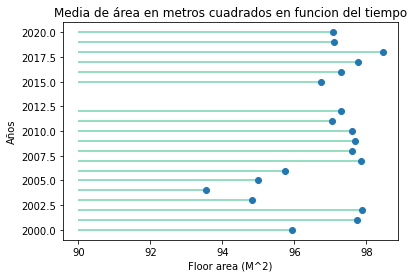

In [ ]:

plt.hlines(values['Year'], xmin = 90, xmax = values['Floor area'], color='#74d3ae')
plt.plot(values['Floor area'], values['Year'], "o")
plt.xlabel('Floor area (M^2)')
plt.ylabel('Años')
plt.title('Media de área en metros cuadrados en funcion del tiempo')

Por medio de este grafico vemos las tendencias de elección de apartamentos en cuanto a metros cuadrados.

# ***3)-Conclusiones***


Algunas de las conlusiones más claras son:

*   Las ciudades Sengkang y Pungool son aquellas que tuvieron un mayor aumento en la cantidad de re-ventas en los últimos años. En particular Sengkang fue la ciudad con mayor recuperaciòn en algunas caídas de ventas
*   Los modelos de apartamento que son  más estables en el tiempo (y por ende que más preservan su valor) son el "Model a" y el "improved"
*   Por medio de la gráfica de 3 dimensiones vemos como el valor de la re-venta aumenta proporcionalmente a la cantidad de cuartos y al área del apartamento
*   En las áreas céntricas el valor de los apartamentos no tiene una correlación tan clara con la cantidad de cuartos y el area total.
*   A medida que los años pasan podemos ver claras tendencias de aumento en ciertas propiedades, que si bien muchas no son mantenidas ne los años, sirven como referencia de que modelos son los mas buscados.

Todas estas conclusiones pueden ser tomadas como una útil guía de inversión, o simplemente para tener la certeza de que la propiedad que uno adquiere va a mantener e incluso va a aumentar su valor.




# ***4)-Algunas Referencias***



*   https://www.youtube.com/watch?v=IBMrXyTR6CU
*   https://www.youtube.com/watch?v=n6Ubiuo0UKA
*   https://www.youtube.com/watch?v=t9Ed5QyO7qY&t=307s
*   https://www.youtube.com/watch?v=vq846lPOJXk
*   https://www.youtube.com/watch?v=eMOA1pPVUc4&t=1597s

